This notebook use mcvine.phonon.powderSQE.IDF.from_data_dir.
The calculation produces pretty good result. However, it seems that we may need more points at qx and qy directions, or we should use a random sampling of the Q space (MC).

In [1]:
import numpy as np, os, glob

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
import histogram.hdf as hh, histogram as H

/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
workdir = '_tmp.model-coherent-SQE-IDF-graphite'
!mkdir -p {workdir}
%cd {workdir}

# Force constants

In [5]:
datadir = os.path.abspath('../../tests/data/graphite/')
!ls {datadir}

dos.dat     FORCE_CONSTANTS  mesh.yaml	phonopy.yaml  SPOSCAR
exp_DOS.h5  FORCE_SETS	     pdos.conf	POSCAR	      total_dos.dat


## From SPOSCAR and POSCAR we can know supercell grid

In [6]:
!head -n 10 {datadir}/SPOSCAR

C
   1.0
    14.6771349835800002    0.0000000000000000    0.0000000000000000
    -7.3385674918200010   12.7107717505800011    0.0000000000000000
     0.0000000000000000    0.0000000000000000    6.6542290476200003
 144
Direct
  0.0000000000000000  0.0000000000000000  0.2500000000000000
  0.1666666666666667  0.0000000000000000  0.2500000000000000
  0.3333333333333333  0.0000000000000000  0.2500000000000000


In [7]:
cat {datadir}/POSCAR

graphite
1.0
   2.4606000000000000    0.0000000000000000    0.0000000000000000
  -1.2303000000000000    2.1309421090000000    0.0000000000000000
   0.0000000000000004    0.0000000000000007    6.7050000000000000
C
4
Direct
   0.0000000000000000    0.0000000000000000    0.0000000000000000    !C
   0.0000000000000000    0.0000000000000000    0.5000000000000000    !C
   0.3333333333333333    0.6666666666666667    0.0000000000000000    !C
   0.6666666666666667    0.3333333333333333    0.5000000000000000    !C


In [8]:
6*6*1

36

# Compute phonon data from force constants

In [6]:
from mcvine.phonon.from_phonopy import idf
reload(idf)

<module 'mcvine.phonon.from_phonopy.idf' from '/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/mcvine/phonon/from_phonopy/idf.pyc'>

In [26]:
%%time
from mcvine.phonon.from_phonopy import make_all
!mkdir -p phonon
%cd phonon
!cp {datadir}/* .

make_all(
    species=['C'], supercell_dims=[6,6,1],
    qgrid_dims=[91,91,91],
    fix_pols_phase=True,
    force_constants='FORCE_CONSTANTS', poscar='POSCAR',
)
%cd -

/home/lj7/dv/mcvine/phonon/examples/_tmp.model-coherent-SQE-IDF-graphite/phonon
* Constructing Q array
* Calling phonopy to compute eigen values and eigen vectors
* Discarding negative freqencies
* Fixing polarizations
* Writing out freqencies
* Writing out polarizations
200.6946494905305
/home/lj7/dv/mcvine/phonon/examples/_tmp.model-coherent-SQE-IDF-graphite
CPU times: user 24min 45s, sys: 46min 33s, total: 1h 11min 18s
Wall time: 7min 31s


# DOS histogram

In [28]:
doshist = hh.load(os.path.join('./phonon/', 'exp_DOS.h5'))

# SQE calc.

In [53]:
import mcvine.phonon.powderSQE.IDF as psidf
reload(psidf)

<module 'mcvine.phonon.powderSQE.IDF' from '/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/mcvine/phonon/powderSQE/IDF.py'>

In [ ]:
disp = psidf.disp_from_datadir('./phonon')

# Ei=30

In [36]:
%%time
IQEhist_Ei_30_T_300 = psidf.from_data_dir(
    datadir='./phonon/',
    disp=disp, 
    N = int(2e6),
    Q_bins=np.arange(0, 4, 0.04), E_bins=np.arange(0,30,.2),
    mass=12., species=['C'], 
    doshist=doshist,
    T=300., Ei=30., max_det_angle=60.,
    include_multiphonon=False,
)

100%|██████████| 12/12 [00:17<00:00,  1.51s/it]


CPU times: user 1min 14s, sys: 5.36 s, total: 1min 20s
Wall time: 1min 19s


plot z in (0, 0.2)


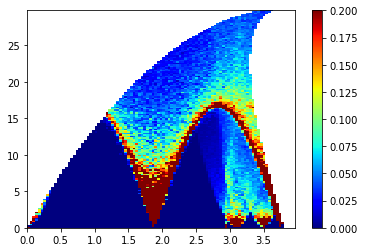

In [38]:
H.plot(IQEhist_Ei_30_T_300, min=0, max=2e-1, cmap='jet')

# Ei=55

In [42]:
%%time
IQEhist_Ei_55_T_300 = psidf.from_data_dir(
    datadir='./phonon/',
    disp=disp, 
    N = int(1e6),
    Q_bins = np.arange(0, 5, 0.05), E_bins = np.arange(0, 55, .5),
    mass=12., species=['C'], 
    doshist=doshist,
    T=300., Ei=55., max_det_angle=60.,
    include_multiphonon=False,
)

100%|██████████| 12/12 [00:10<00:00,  1.32it/s]

CPU times: user 38.6 s, sys: 3.07 s, total: 41.7 s
Wall time: 41.5 s


plot z in (0, 0.1)


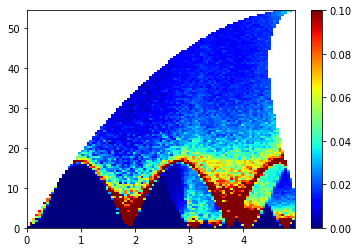

In [46]:
H.plot(IQEhist_Ei_55_T_300, min=0, max=1e-1, cmap='jet')

# Ei=125

In [44]:
%%time
IQEhist_Ei_125_T_300 = psidf.from_data_dir(
    datadir='./phonon/',
    disp=disp, 
    N = int(1e6),
    Q_bins = np.arange(0, 7.5, 0.05), E_bins = np.arange(0, 120, 1.),
    mass=12., species=['C'], 
    doshist=doshist,
    T=300., Ei=125., max_det_angle=60.,
    include_multiphonon=False,
)

100%|██████████| 12/12 [00:11<00:00,  1.08it/s]

CPU times: user 38.9 s, sys: 3.39 s, total: 42.3 s
Wall time: 42.1 s


plot z in (0, 0.05)


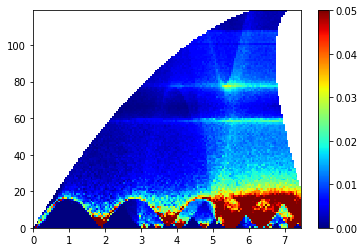

In [47]:
H.plot(IQEhist_Ei_125_T_300, min=0, max=.05, cmap='jet')

# Ei=300

In [54]:
%%time
IQEhist_Ei_300_T_300 = psidf.from_data_dir(
    datadir='./phonon/',
    disp=disp, 
    N = int(1e6),
    Q_bins = np.arange(0, 23, 0.1), E_bins = np.arange(0, 250, 1),
    mass=12., species=['C'], 
    doshist=doshist,
    T=300., Ei=300., 
    include_multiphonon=True,
)

100%|██████████| 12/12 [00:08<00:00,  1.41it/s]


CPU times: user 41.2 s, sys: 9.54 s, total: 50.7 s
Wall time: 40.3 s


plot z in (0, 0.0025)


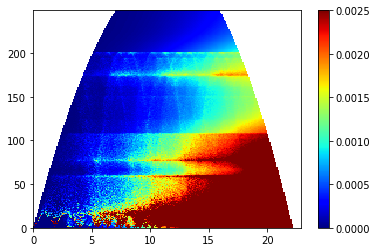

In [55]:
H.plot(IQEhist_Ei_300_T_300, min=0, max=2.5e-3, cmap='jet')